In [1]:
import torch
import os
from torchvision.models.detection import maskrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

CURRENT_DIR = os.path.dirname(os.path.abspath("__file__"))


In [3]:
# Load the pre-trained model
model = maskrcnn_resnet50_fpn(pretrained=True)
model = model.eval()

# Load your image
image = Image.open(os.path.join(CURRENT_DIR, '..', 'dataset', 'rawimages', "Ganglioneuroblastoma_0.tif")).convert("L")
# Convert PIL image to tensor
image_tensor = F.to_tensor(image)
# Add an extra dimension at the beginning of the tensor, which represents the batch size
image_tensor = image_tensor.unsqueeze(0)

# Check for GPU availability and if available, move the model and input tensor to GPU
if torch.cuda.is_available():
    model = model.cuda()
    image_tensor = image_tensor.cuda()

# Perform inference
with torch.no_grad():
    prediction = model(image_tensor)
    print(prediction)

[{'boxes': tensor([[  11.5696,    0.0000, 1225.0000,  900.4765],
        [  54.8189,    3.4485, 1209.5342,  914.0001]], device='cuda:0'), 'labels': tensor([64, 85], device='cuda:0'), 'scores': tensor([0.0865, 0.0539], device='cuda:0'), 'masks': tensor([[[[0.0546, 0.0602, 0.0657,  ..., 0.0941, 0.0903, 0.0865],
          [0.0579, 0.0638, 0.0697,  ..., 0.0998, 0.0958, 0.0918],
          [0.0613, 0.0675, 0.0737,  ..., 0.1055, 0.1013, 0.0970],
          ...,
          [0.0170, 0.0188, 0.0205,  ..., 0.0375, 0.0360, 0.0345],
          [0.0139, 0.0153, 0.0167,  ..., 0.0306, 0.0294, 0.0281],
          [0.0107, 0.0118, 0.0129,  ..., 0.0237, 0.0227, 0.0218]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0380, 0.0332, 0.0284],
          [0.0000, 0.0000, 0.0000,  ..., 0.0409, 0.0357, 0.0305],
          [0.0000, 0.0000, 0.0000,  ..., 0.0438, 0.0382, 0.0326],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0618, 0.0539, 0.0461],
          [0.0000, 0.0000, 0.0000,  ..., 0.0586, 0.0511, 0.04

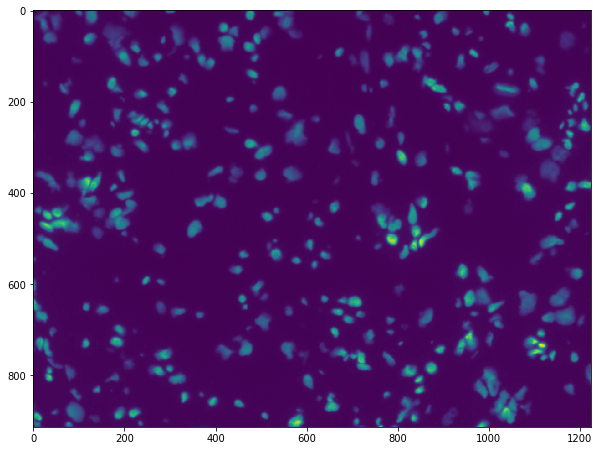

In [63]:
plt.figure(figsize=(10, 10))
plt.imshow(image)

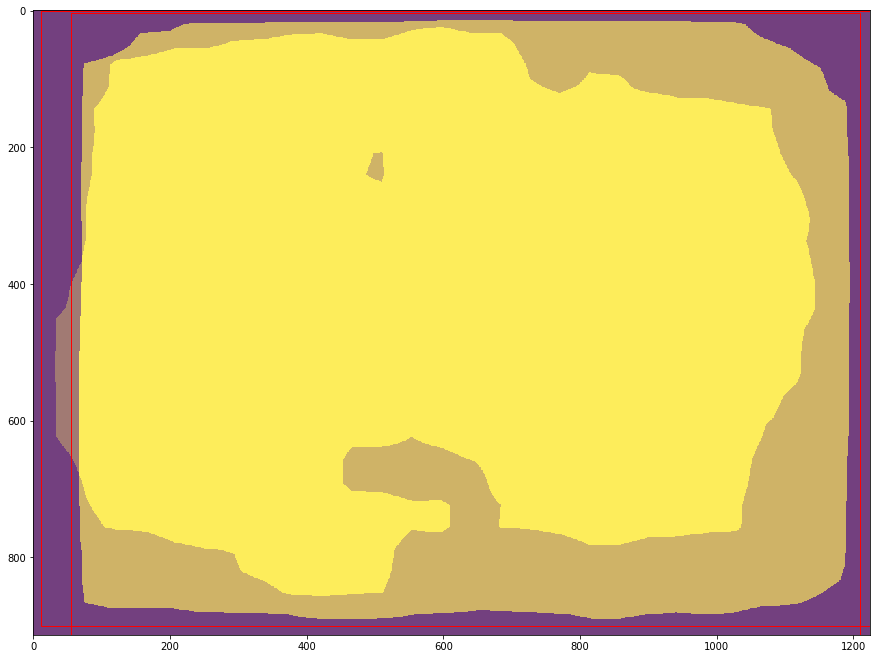

In [57]:
pred = prediction[0]

# The masks are binary masks of shape (N, 1, H, W),
# where N is the number of predicted masks (i.e., number of instances),
# H and W are the height and width of the masks
masks = pred['masks'].cpu().detach().numpy()
scores = pred['scores'].cpu().detach().numpy()
boxes = pred['boxes'].cpu().detach().numpy()

# Let's take a threshold for the scores
threshold = 0.8
# Only consider instances with confidence score above the threshold
# Find indices of scores above the threshold

# Create a figure and axes
fig, ax = plt.subplots(1, figsize=(15, 15))

# Display the image
# ax.imshow(image)

# For each mask
for i in range(masks.shape[0]):
    # Draw the mask
    mask = masks[i, 0]
    ax.imshow(mask > threshold, alpha=0.5)
    
    # Draw the bounding box
    box = boxes[i]
    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

In [2]:
y = Image.open(os.path.join(CURRENT_DIR, '..', 'dataset', 'groundtruth', "Ganglioneuroblastoma_0.tif")).convert("L")

In [6]:
y = np.array(y)
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [7]:
np.unique(y)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [13]:
y & (y == 0)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

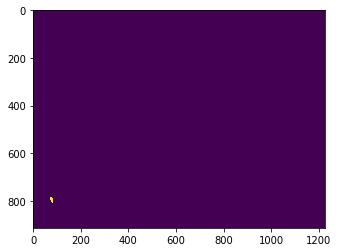

In [15]:
plt.imshow(y & (y == 1))

In [17]:
pos = np.where(y == 1)

# Calculate the minimum and maximum coordinates
xmin = pos[1].min()
xmax = pos[1].max()
ymin = pos[0].min()
ymax = pos[0].max()

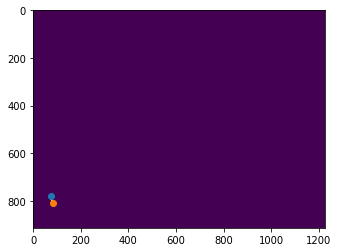

In [19]:
plt.imshow(y & (y == 1))
plt.scatter(xmin, ymin)
plt.scatter(xmax, ymax)